# Exploratory Factor Analysis


In [15]:
# Importing the Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Generate the dataframe from the excel file

In [16]:
# Importing the dataset
df_train = pd.read_csv("train.csv") ## As the dataset is in excel format
df_test = pd.read_csv("test.csv") ## As the dataset is in excel format
df = pd.concat([df_train,df_test])
df.head(5)
# We have a total of 99 datapoints and 14 features

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Drop the columns that represent the ratings


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

In [18]:
df.drop(columns = ['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age',
                   'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay in Minutes', 
                   'Arrival Delay in Minutes','satisfaction'], axis=1,inplace=True)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Inflight wifi service              129880 non-null  int64
 1   Departure/Arrival time convenient  129880 non-null  int64
 2   Ease of Online booking             129880 non-null  int64
 3   Gate location                      129880 non-null  int64
 4   Food and drink                     129880 non-null  int64
 5   Online boarding                    129880 non-null  int64
 6   Seat comfort                       129880 non-null  int64
 7   Inflight entertainment             129880 non-null  int64
 8   On-board service                   129880 non-null  int64
 9   Leg room service                   129880 non-null  int64
 10  Baggage handling                   129880 non-null  int64
 11  Checkin service                    129880 non-null  int64
 12  Inf

### Zero Center data
Find $\tilde{x}_{n}$ from $x_{n}$

In [20]:
x = df.values
x_mean = np.mean(x,axis=0)
x_n = x - np.matrix(x_mean)
x_n = x_n.T ## Converts row vectors to column vectors
print(x_n.shape)

(14, 129880)


### Generate Covariance Matrix

In [21]:
C1 = np.cov(x_n)
C2 = np.corrcoef(x_n)## Corr(x,y) = Cov(x,y)/sqrt(Var(x)*Var(y))

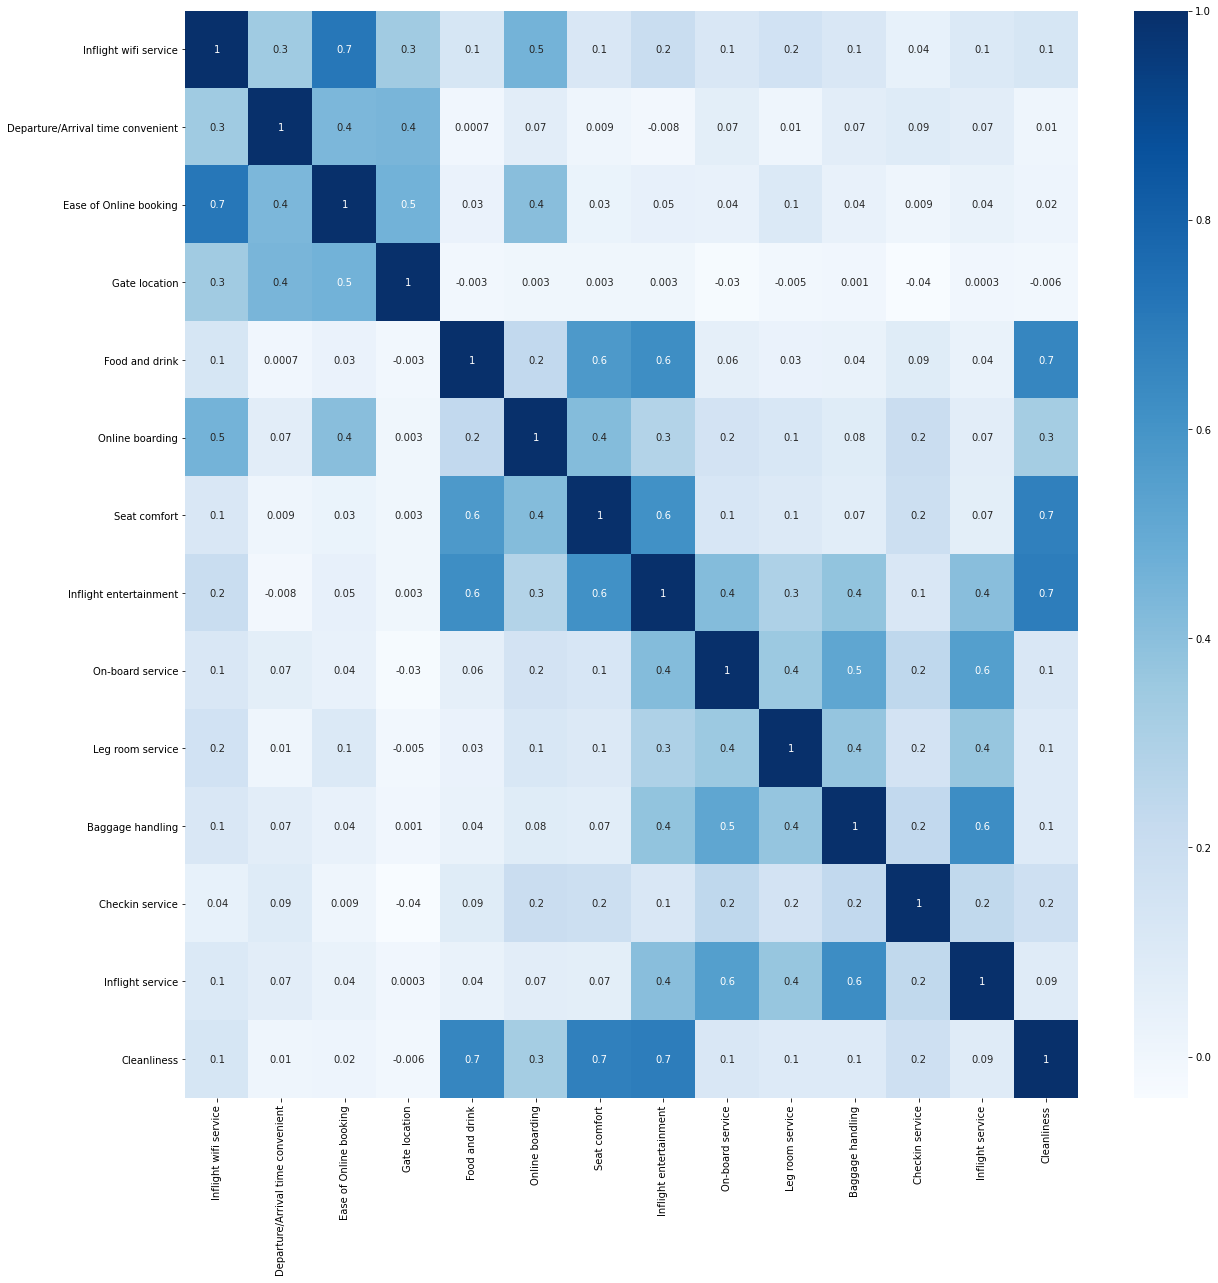

In [22]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(C2,annot=True,fmt='.1g',cmap='Blues', xticklabels=df.columns, yticklabels=df.columns)

In [23]:
df.shape

(129880, 14)

### Extract the eigen vectors and eigen values

In [24]:
eig_val,eig_vec = np.linalg.eig(C1)
eig_sorted = np.sort(eig_val)[::-1]
arg_sort = np.argsort(eig_val)[::-1]
print("eigen values", eig_sorted)


eigen values [6.52802431 4.5024508  3.43870712 1.98341649 1.61700753 1.17688591
 1.02248896 0.87827659 0.7491141  0.57986564 0.51473344 0.51140269
 0.47659755 0.32711101]


### Plot Scree Plot to identify the factors

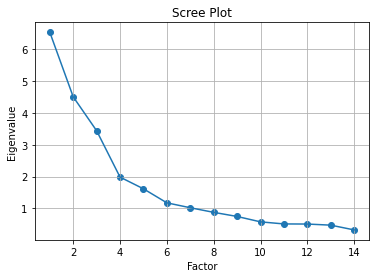

In [25]:
xvals = range(1, df.shape[1]+1)
plt.scatter(xvals, eig_sorted)
plt.plot(xvals,eig_sorted)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()

### Build the Vector based on the latent factors (=8)

In [26]:
eig_vec_ls = []
eig_val_ls = []
imp_vec = arg_sort[:8]
for i in imp_vec:
    eig_vec_ls.append(eig_vec[:,i])
    eig_val_ls.append(eig_val[i])


### Estimate V

In [28]:
eig_val_arr  = np.array(eig_val_ls)
lambda_1 = np.diag(eig_val_arr)
eig_vec_mat = np.matrix(eig_vec_ls).T
V = eig_vec_mat@np.sqrt(lambda_1)
print(V.shape)

Factor_Loading = pd.DataFrame(np.matrix(V),index = df.columns, columns = ['factor 1','factor 2','factor 3','factor 4','factor 5','factor 6','factor 7','factor 8'])
Factor_Loading

(14, 8)


,factor 1,factor 2,factor 3,factor 4,factor 5,factor 6,factor 7,factor 8
Inflight wifi service,0.689384,0.828194,0.099140,0.412571,0.204022,-0.101755,0.078067,0.316042
Departure/Arrival time convenient,0.389534,1.042700,-0.013594,-0.784840,-0.359971,0.022636,-0.581885,0.032698
Ease of Online booking,0.551344,1.091577,0.138968,0.334123,0.160325,-0.020311,0.125494,0.150680
Gate location,0.231332,0.803359,0.121022,-0.487279,0.201293,0.141715,0.622727,-0.433323
Food and drink,0.824286,-0.430614,0.591387,-0.266576,0.143782,-0.000426,0.054180,0.415640
Online boarding,0.792463,0.210507,0.269917,0.791865,-0.310834,-0.154171,-0.214128,-0.333463
Seat comfort,0.909360,-0.421662,0.502034,-0.061431,-0.145308,0.099282,-0.056169,-0.390093
Inflight entertainment,1.087528,-0.465971,0.007799,-0.196763,0.310877,-0.101633,0.017812,0.038714
On-board service,0.618314,-0.138001,-0.811886,-0.031417,-0.005999,-0.339467,-0.082608,-0.257760
Leg room service,0.521587,-0.047984,-0.676170,0.207420,0.314982,0.901248,-0.197776,-0.022391


### Estimate S(additional source)

In [29]:
var_ls = []
x_var = np.var(x_n,axis=1)
x_var = np.ravel(x_var)
print(x_var.shape)
print(x_var)
for i in range(V.shape[0]):
    s = np.sum(np.square(np.ravel(V[i,:])))
    sig_2 = x_var[i] - s
    var_ls.append(sig_2)
var_ls = np.array(var_ls)
S = np.diag(var_ls)
print(S)

(14,)
[1.76713159 2.33092162 1.96485879 1.63459997 1.76870835 1.82442716
 1.74050976 1.77967299 1.65661199 1.73250539 1.39244727 1.60321295
 1.38453945 1.72574773]
[[0.26797565 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.00605256 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.27381875 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.04745238 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.28666697 0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.17477533
  0.         0.         0.         0.      

**Dimensionality reduction transformation**

In [189]:
C1_inv = np.linalg.inv(C1)
W = V.T@C1_inv
print(W.shape)
print(W)

(8, 14)
[[ 1.05603758e-01  5.96709721e-02  8.44579490e-02  3.54367183e-02
   1.26268761e-01  1.21394022e-01  1.39300880e-01  1.66593783e-01
   9.47168210e-02  7.98996781e-02  7.90459371e-02  6.32636519e-02
   7.95963043e-02  1.42492564e-01]
 [ 1.83942966e-01  2.31585020e-01  2.42440574e-01  1.78427054e-01
  -9.56398330e-02  4.67538456e-02 -9.36517565e-02 -1.03492855e-01
  -3.06502375e-02 -1.06572939e-02 -2.09218479e-02 -2.14152827e-02
  -2.30460166e-02 -1.03567294e-01]
 [ 2.88307350e-02 -3.95311909e-03  4.04127219e-02  3.51940305e-02
   1.71979380e-01  7.84937919e-02  1.45994984e-01  2.26808976e-03
  -2.36102025e-01 -1.96635051e-01 -2.28094057e-01 -8.97273379e-02
  -2.32595253e-01  1.46432602e-01]
 [ 2.08010349e-01 -3.95700844e-01  1.68458565e-01 -2.45676506e-01
  -1.34402575e-01  3.99243076e-01 -3.09724311e-02 -9.92042154e-02
  -1.58399791e-02  1.04577055e-01 -4.75769161e-02  2.06991376e-02
  -5.75300186e-02 -1.00742274e-01]
 [ 1.26172672e-01 -2.22615458e-01  9.91494198e-02  1.2448516

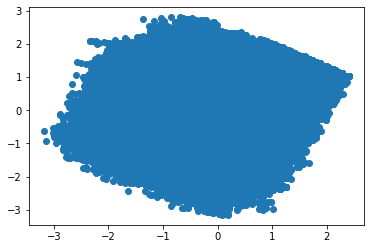

In [190]:
z = W@x_n
z1 = z.T
plt.scatter(np.ravel(z1[:,0]),np.ravel(z1[:,1]))
plt.show()

In [191]:
z.shape

(8, 129880)

In [192]:
W

matrix([[ 1.05603758e-01,  5.96709721e-02,  8.44579490e-02,
          3.54367183e-02,  1.26268761e-01,  1.21394022e-01,
          1.39300880e-01,  1.66593783e-01,  9.47168210e-02,
          7.98996781e-02,  7.90459371e-02,  6.32636519e-02,
          7.95963043e-02,  1.42492564e-01],
        [ 1.83942966e-01,  2.31585020e-01,  2.42440574e-01,
          1.78427054e-01, -9.56398330e-02,  4.67538456e-02,
         -9.36517565e-02, -1.03492855e-01, -3.06502375e-02,
         -1.06572939e-02, -2.09218479e-02, -2.14152827e-02,
         -2.30460166e-02, -1.03567294e-01],
        [ 2.88307350e-02, -3.95311909e-03,  4.04127219e-02,
          3.51940305e-02,  1.71979380e-01,  7.84937919e-02,
          1.45994984e-01,  2.26808976e-03, -2.36102025e-01,
         -1.96635051e-01, -2.28094057e-01, -8.97273379e-02,
         -2.32595253e-01,  1.46432602e-01],
        [ 2.08010349e-01, -3.95700844e-01,  1.68458565e-01,
         -2.45676506e-01, -1.34402575e-01,  3.99243076e-01,
         -3.09724311e-02, -9